# Concentrations of heavy metals in soil and grapevine leaf samples from vineyards in the Cape Winelands

-----

* Title: **Chemical dataset of levels of heavy metals in vineyard soil and grapevine leaf samples from Cape Winelands, South Africa**  
* Author: **Amanda Mahlungulu, Learnmore Kambizi, Enoch A. Akinpelu, Felix Nchu**  
* Department of Horticultural Sciences, Cape Peninsula University of Technology, Bellville Campus, Symphony Way, PO Box 1906, Bellville 7535, South Africa  
* Received 8 February 2023, Revised 14 March 2023, Accepted 15 March 2023, Available online 21 March 2023, Version of Record 30 March 2023.   

https://www.sciencedirect.com/science/article/pii/S2352340923002019#refdata001

## Abstract

The chemical analysis of vineyards is an essential tool for the early detection of risks, such as excessive fertilization and heavy metal and pesticide contamination in farm management. Soil and plant samples were collected in summer and winter from six different vineyards with varying agricultural practices in the Cape Winelands of the Western Cape Province, South Africa. The samples were pretreated in a microwave using CEM MARS 6™ Microwave Digestion and Extraction System (CEM Corporation, Matthews, NC, USA). Chemical element data were obtained using an inductively coupled plasma optical emission spectrometer (ICP-OES) (ICP Expert II, Agilent Technologies 720 ICP-OES). The data will be valuable for selecting and improving farming practices and gaining insights into the influence of seasonal variation and agricultural practices on the elemental accumulation in farmlands.

In [1]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def fourth_root(df):
    return(df**(1/4))

## Data Preprocessing

In [2]:
sheetname = "Soil chemical analysis"
num_row_skip = 1
df = pd.read_excel('SOIL AND PLANT DATA 04 Feb 2023.xlsx',
                   sheet_name=sheetname,
                   skiprows=num_row_skip
                  ).dropna(axis = 0, how='all').dropna(axis = 1, how = 'all')
df.head()

,Name of Farm,Coded Site name in thesis and publication,Annonimised name,Locality,Cultivation Method,Season,Coordinates,Unnamed: 7,B,V,...,Hg,Pb,Al,Fe,Ca,K,Mg,Na,P,Si
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ug/kg,ug/kg,...,ug/kg,ug/kg,ug/kg,ug/kg,ug/kg,ug/kg,ug/kg,ug/kg,ug/kg,ug/kg
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOQ (Limit of quantification),304.331121,0.88827,...,9.441312,2.560203,15,25,50,50,50,50,50,50
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,% Recovery on Certified Reference Material Tom...,113.335106,106.789041,...,107.330208,103.310833,107.3688,99.27482,97.681511,120.717379,102.902954,92.383496,101.250986,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,% Accuracy on internal QC,112.61725,105.846024,...,102.831584,99.240442,108.4,106.2,102.1,99.89,104.5,101.8,102.515152,102.5
6,Hidden,F,ODR1,Piketberg,Organic farm,Summer,"Y =-32.96663, X =18.75134",NaN,19706.300168,78890.846396,...,21.780695,17824.978718,49953.358209,34291.044776,3480.410448,11016.791045,2233.675373,629.664179,621.735075,1507.929104


In [3]:
#parse meta data
meta_data = df[['Annonimised name', 'Cultivation Method', 'Season']].dropna()
meta_data.columns = ['sample_id', 'cultivation_method', 'season'] 
meta_data['season'] = meta_data.season.str.strip()


#parse analytical data
analytical_data = df.loc[:,"B":].drop([0,1,4], axis = 0).dropna()
analytical_data.columns = analytical_data.columns.str.lower()

In [4]:
all_data = pd.concat([meta_data[['sample_id','cultivation_method']], analytical_data], axis = 1).reset_index(drop = True)
all_data.head()

,sample_id,cultivation_method,b,v,cr,mn,co,ni,cu,zn,...,hg,pb,al,fe,ca,k,mg,na,p,si
0,ODR1,Organic farm,19706.300168,78890.846396,59914.667471,489033.004126,12944.60525,26616.35729,41142.693518,49699.993229,...,21.780695,17824.978718,49953.358209,34291.044776,3480.410448,11016.791045,2233.675373,629.664179,621.735075,1507.929104
1,ODR2,Organic farm,24145.915883,91897.928802,63517.785473,206327.263287,8050.444952,27505.129994,49483.864739,49296.438821,...,13.028723,21826.353347,73642.645607,44610.069102,3111.056269,10784.797631,2442.744324,611.056269,763.573544,1989.634748
2,ODR3,Organic farm,19135.722924,74847.190344,50832.466455,127602.797387,6011.742602,19533.143751,27092.688336,32331.157644,...,9.14034,16962.434259,50867.052023,31445.086705,1170.038536,7105.009634,1740.847784,352.119461,499.518304,2021.194605
3,ODR4,Organic farm,33500.771361,99494.604543,84596.833395,314183.91958,9593.250032,36550.876996,32463.952835,35379.344973,...,16.191717,20876.430084,70474.777448,43397.626113,1820.969337,9673.590504,2276.953511,435.212661,381.454006,2648.862512
4,WH1,Organic farm,5890.180918,24439.124215,20456.186536,124002.162886,1659.871792,6065.916527,62331.543183,49616.384648,...,33.580731,5872.256083,14892.473118,10596.285435,4492.179863,1608.504399,1299.608993,297.1652,732.649071,1237.536657


# Elemental Impurity Data

In [5]:
y = meta_data['cultivation_method'] != 'Organic farm'
X1 = analytical_data.loc[y].pipe(fourth_root)
X_val = analytical_data.loc[~y].pipe(fourth_root)

<AxesSubplot: xlabel='pc1', ylabel='pc2'>

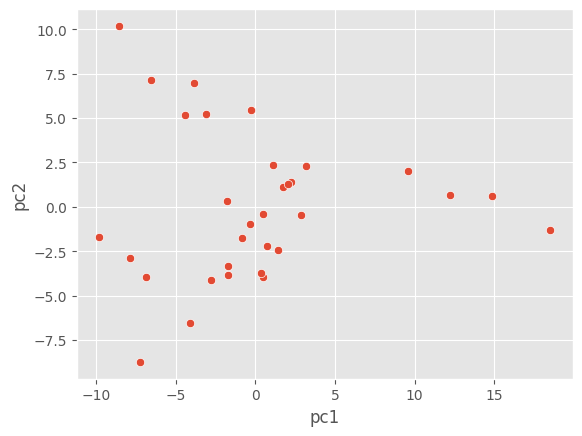

In [6]:
pc_cols = ['pc1', 'pc2']
pca = PCA(2).set_output(transform = 'pandas')
scores = pca.fit_transform(X1)
scores.columns = pc_cols

scores.head()
plt.style.use('ggplot')
sns.scatterplot(data = scores, x = 'pc1', y = 'pc2')

In [7]:
clf = OneClassSVM(kernel='poly', degree=3, nu = 0.15)
clf.fit_predict(X1)

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1])

<AxesSubplot: xlabel='pc1', ylabel='pc2'>

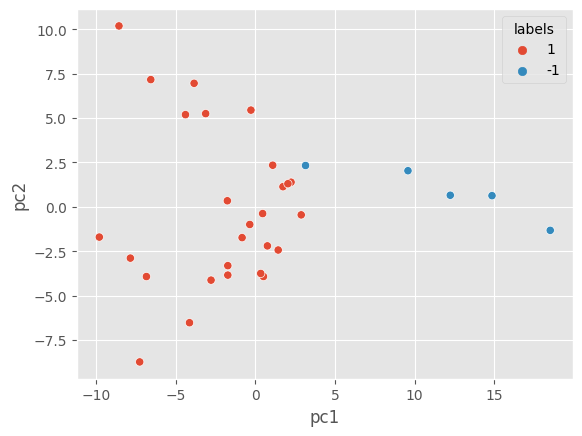

In [8]:
scores['labels'] = clf.fit_predict(X1).astype(str)
sns.scatterplot(data = scores, x = 'pc1', y = 'pc2', hue = 'labels')

In [9]:
scores_val = pca.transform(X_val)
scores_val.columns = pc_cols

scores_val['labels'] = clf.predict(X_val).astype(str)
scores_val.head()

,pc1,pc2,labels
6,-10.903419,5.130704,1
7,-9.971386,1.519510,1
8,-5.231837,-0.231622,1
9,-10.972157,0.994835,1
11,2.793185,1.775910,1


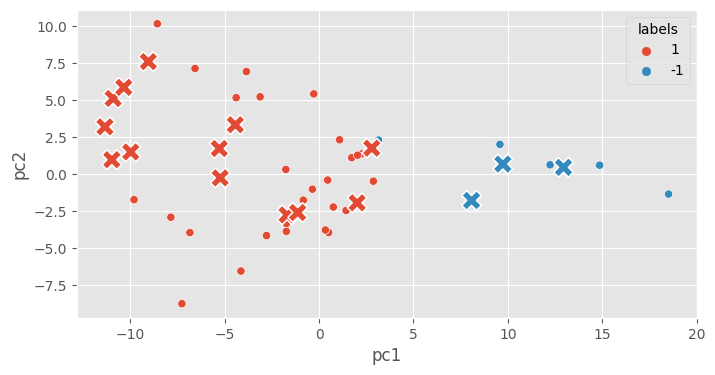

In [18]:
plt.figure(figsize = (8,4))
fig = sns.scatterplot(data = scores, x = 'pc1', y = 'pc2', hue = 'labels')
fig = sns.scatterplot(data = scores_val, x = 'pc1', y = 'pc2', s = 200, 
                marker = 'X', hue = 'labels', legend = False


<AxesSubplot: >

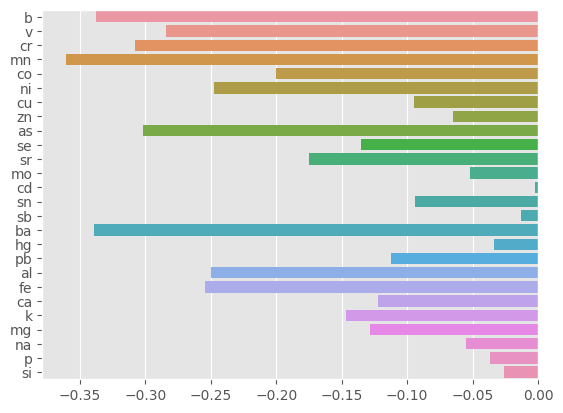

In [11]:
sns.barplot(x = pca.components_[0], y = X1.columns)

<AxesSubplot: >

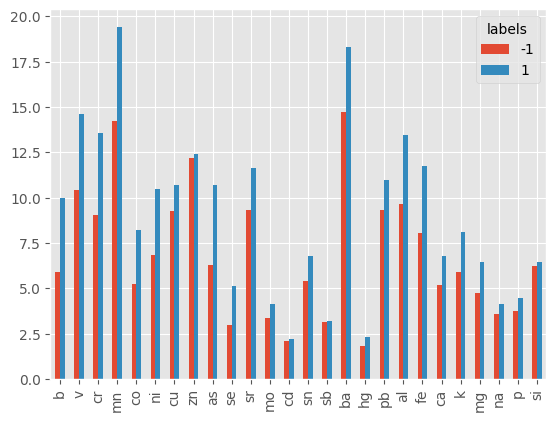

In [12]:
X1.groupby(scores.labels).mean().T.plot.bar()